**Description:**  
 Notebook for the analysis of scoring results (questions) for 50 READMEs created by LLama 3.1 8B and Jamba 1.5 Mini using the modified prompt. Keep in mind, the evaluation scores of the orignal README are the same like in df_score_lama because it make no sense the evaluate the same file twice. Commands to save figures and dataframes are comment out!  
**Dependencies**:  
 + preprocessing/05_counts.ipynb
 + data/df_repos_counts_filtered.json
 + data/df_score_lama_mod/
 + data/df_score_jamba_mod/
 + data/evaluation_results/df_llama_mod_questions.json
 + data/evaluation_results/df_llama_questions.json
 + data/evaluation_results/df_jamba_mod_questions.json
 + data/evaluation_results/df_jamba_questions.json

*Hint: If lines are created with support of a Large Language Model or the code is taken from another source, you find following hint at the end of the line: (generated with Microsoft Copilot) or (source: link_to_source)*

In [ ]:
import pandas as pd # package for data manipulation
import json # package to work with JSON files
import matplotlib.pyplot as plt # package for plotting
import numpy as np # package for numeric operations
import seaborn as sns # package for plotting (works with matplotlib)

### Universal Functions

In [ ]:
# function to load json file for specific path and save its content as dataframe
def load_data(path):
    with open(path, 'r') as f:
        loaded_data = json.load(f)

    df = pd.DataFrame(data=loaded_data)

    return df

### df_llama_q

In [25]:
df_llama_q = load_data('../data/evaluation_results/df_llama_questions.json')
df_llama_q = df_llama_q.loc[0:49]

In [26]:
len(df_llama_q)

50

In [27]:
df_llama_q.head(3)

,id,repo_owner,repo_name,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
0,openstack_openstack,openstack,openstack,4.666667,4.000000,5.000000,3.000000,3.333333,4.000000,4.0,3.000000,4.333333,4.000000
1,majumderb_rezero,majumderb,rezero,5.000000,4.333333,5.000000,3.333333,4.666667,5.000000,5.0,4.666667,3.666667,5.000000
2,andkret_Cookbook,andkret,Cookbook,5.000000,4.333333,4.666667,2.666667,3.333333,4.666667,5.0,4.000000,4.000000,3.666667


In [28]:
df_llama_q.describe()

,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.606667,4.273333,4.620000,2.786667,3.313333,4.620000,4.580000,4.526667,3.640000,4.033333
std,0.327777,0.354370,0.404117,0.465402,0.548798,0.594800,0.546313,0.508834,0.837987,0.830949
min,3.666667,3.333333,3.333333,2.000000,2.333333,2.666667,2.666667,2.666667,1.666667,2.000000
25%,4.333333,4.000000,4.416667,2.333333,3.000000,4.333333,4.333333,4.333333,3.000000,3.416667
50%,4.666667,4.333333,4.666667,3.000000,3.333333,5.000000,4.666667,4.666667,3.666667,4.166667
75%,5.000000,4.666667,5.000000,3.000000,3.333333,5.000000,5.000000,5.000000,4.333333,4.666667
max,5.000000,4.666667,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### df_jamba_q

In [29]:
df_jamba_q = load_data('../data/evaluation_results/df_jamba_questions.json')

In [30]:
len(df_jamba_q)

50

In [31]:
df_jamba_q.head(3)

,id,repo_owner,repo_name,model_type,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
0,openstack_openstack,openstack,openstack,llama3.1-8b,5.000000,4.333333,4.666667,2.666667,2.666667,4.000000,4.0,3.000000,4.333333,4.000000
1,majumderb_rezero,majumderb,rezero,llama3.1-8b,4.000000,3.666667,3.333333,2.333333,2.666667,5.000000,5.0,4.666667,3.666667,5.000000
2,andkret_Cookbook,andkret,Cookbook,llama3.1-8b,4.333333,4.000000,3.000000,2.333333,3.000000,4.666667,5.0,4.000000,4.000000,3.666667


In [32]:
df_jamba_q.describe()

,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.346667,4.000000,3.746667,2.360000,3.020000,4.620000,4.580000,4.526667,3.640000,4.033333
std,0.609673,0.538748,0.934499,0.554675,0.544650,0.594800,0.546313,0.508834,0.837987,0.830949
min,2.666667,2.666667,2.000000,1.333333,1.666667,2.666667,2.666667,2.666667,1.666667,2.000000
25%,4.333333,3.666667,3.083333,2.000000,2.666667,4.333333,4.333333,4.333333,3.000000,3.416667
50%,4.333333,4.000000,3.666667,2.333333,3.000000,5.000000,4.666667,4.666667,3.666667,4.166667
75%,4.666667,4.333333,4.666667,2.666667,3.333333,5.000000,5.000000,5.000000,4.333333,4.666667
max,5.000000,4.666667,5.000000,3.666667,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000


### df_llama_mod_q

In [33]:
df_llama_mod_q = load_data('../data/evaluation_results/df_llama_mod_questions.json')

In [34]:
len(df_llama_mod_q)

50

In [35]:
df_llama_mod_q.head(3)

,id,repo_owner,repo_name,model_type,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
0,openstack_openstack,openstack,openstack,llama3.1-8b,4.666667,4.000000,5.0,3.000000,3.333333,4.000000,4.0,3.000000,4.333333,4.000000
1,majumderb_rezero,majumderb,rezero,llama3.1-8b,5.000000,4.666667,5.0,3.333333,3.666667,5.000000,5.0,4.666667,3.666667,5.000000
2,andkret_Cookbook,andkret,Cookbook,llama3.1-8b,4.666667,4.333333,4.0,2.666667,3.333333,4.666667,5.0,4.000000,4.000000,3.666667


### df_jamba_mod_q

In [36]:
df_jamba_mod_q = load_data('../data/evaluation_results/df_jamba_mod_questions.json')

In [37]:
len(df_jamba_mod_q)

50

In [38]:
df_jamba_mod_q.head(3)

,id,repo_owner,repo_name,model_type,score_q1_g_1,score_q2_g_2,score_q3_g_3,score_q4_g_4,score_q5_g_5,score_q1_o_1,score_q2_o_2,score_q3_o_3,score_q4_o_4,score_q5_o_5
0,openstack_openstack,openstack,openstack,llama3.1-8b,4.333333,4.333333,4.333333,3.000000,3.333333,4.000000,4.0,3.000000,4.333333,4.000000
1,majumderb_rezero,majumderb,rezero,llama3.1-8b,4.333333,4.333333,2.333333,3.333333,2.333333,5.000000,5.0,4.666667,3.666667,5.000000
2,andkret_Cookbook,andkret,Cookbook,llama3.1-8b,4.666667,4.666667,5.000000,2.333333,2.666667,4.666667,5.0,4.000000,4.000000,3.666667


## Visualize

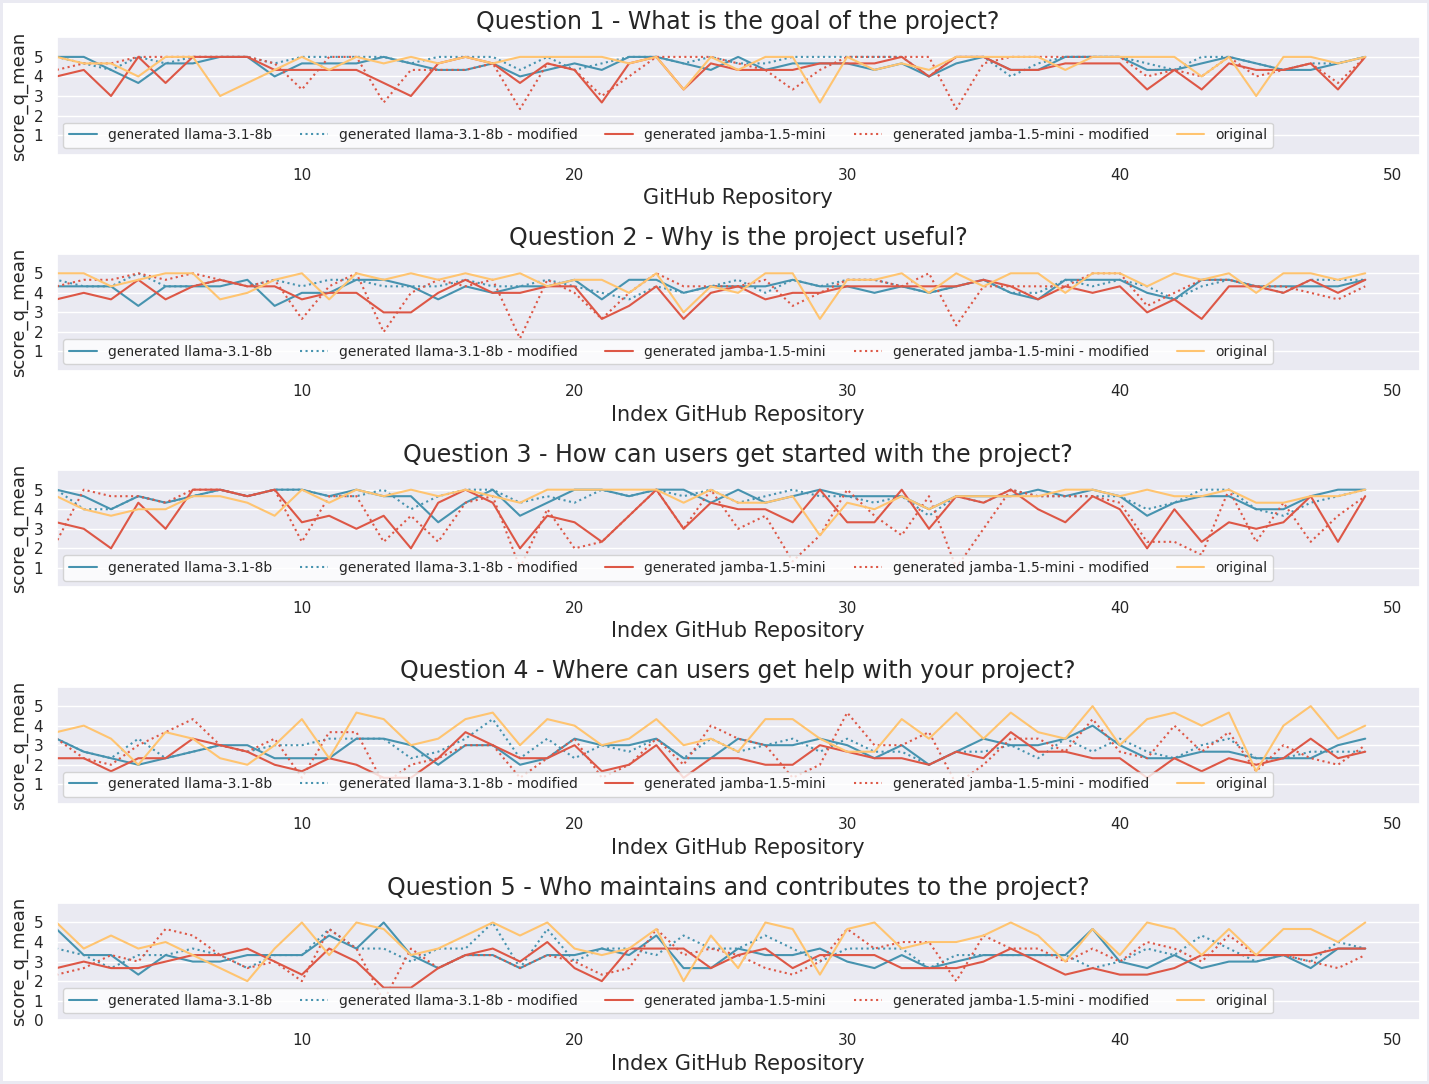

In [39]:
# colors = ['#4793AF', '#FFC470', '#DD5746']

with sns.axes_style('white'): # applies white Seaborn style for axes
    sns.set_theme(style='dark') # applies dark Seaboarn style for better contrast
    fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(15, 11)) # create a figure and define size of plot
    fig.patch.set_edgecolor('#eaeaf2')  # your color of choice
    fig.patch.set_linewidth(4)          # thickness of the frame


    # generated llama
    q1_g_l = df_llama_q['score_q1_g_1']
    q2_g_l = df_llama_q['score_q2_g_2']
    q3_g_l = df_llama_q['score_q3_g_3']
    q4_g_l = df_llama_q['score_q4_g_4']
    q5_g_l = df_llama_q['score_q5_g_5']

    # generated jamba
    q1_g_j = df_jamba_q['score_q1_g_1']
    q2_g_j = df_jamba_q['score_q2_g_2']
    q3_g_j = df_jamba_q['score_q3_g_3']
    q4_g_j = df_jamba_q['score_q4_g_4']
    q5_g_j = df_jamba_q['score_q5_g_5']

    # generated llama_mod
    q1_g_l_m = df_llama_mod_q['score_q1_g_1']
    q2_g_l_m = df_llama_mod_q['score_q2_g_2']
    q3_g_l_m = df_llama_mod_q['score_q3_g_3']
    q4_g_l_m = df_llama_mod_q['score_q4_g_4']
    q5_g_l_m = df_llama_mod_q['score_q5_g_5']

    # generated jamba_mod
    q1_g_j_m = df_jamba_mod_q['score_q1_g_1']
    q2_g_j_m = df_jamba_mod_q['score_q2_g_2']
    q3_g_j_m = df_jamba_mod_q['score_q3_g_3']
    q4_g_j_m = df_jamba_mod_q['score_q4_g_4']
    q5_g_j_m = df_jamba_mod_q['score_q5_g_5']
    
    # origignal
    q1_o = df_jamba_mod_q['score_q1_o_1']
    q2_o = df_jamba_mod_q['score_q2_o_2']
    q3_o = df_jamba_mod_q['score_q3_o_3']
    q4_o = df_jamba_mod_q['score_q4_o_4']
    q5_o = df_jamba_mod_q['score_q5_o_5']

    ax[0].plot(q1_g_l, label='generated llama-3.1-8b', color='#4793AF')
    ax[0].plot(q1_g_l_m, label='generated llama-3.1-8b - modified', color='#4793AF', linestyle=':')
    ax[0].plot(q1_g_j, label='generated jamba-1.5-mini', color='#DD5746')
    ax[0].plot(q1_g_j_m, label='generated jamba-1.5-mini - modified', color='#DD5746', linestyle=':')
    ax[0].plot(q1_o, label='original', color='#FFC470')
    ax[0].set_title('Question 1 - What is the goal of the project?', fontsize=17)
    ax[0].legend(ncol=5, loc=3, fontsize=10, facecolor='white') 
    ax[0].set_xlim(1,51)
    ax[0].set_xlabel('GitHub Repository', fontsize=15)
    ax[0].set_yticks([1, 2, 3, 4, 5])
    ax[0].set_ylim(0,6)
    ax[0].set_ylabel('score_q_mean', fontsize=13)
    ax[0].grid(visible=True, axis='y')

    ax[1].plot(q2_g_l, label='generated llama-3.1-8b', color='#4793AF')
    ax[1].plot(q2_g_l_m, label='generated llama-3.1-8b - modified', color='#4793AF', linestyle=':')
    ax[1].plot(q2_g_j, label='generated jamba-1.5-mini', color='#DD5746')
    ax[1].plot(q2_g_j_m, label='generated jamba-1.5-mini - modified', color='#DD5746', linestyle=':')
    ax[1].plot(q2_o, label='original', color='#FFC470')
    ax[1].set_title('Question 2 - Why is the project useful?', fontsize=17)
    ax[1].legend(ncol=5, loc=3, fontsize=10, facecolor='white') 
    ax[1].set_xlim(1,51)
    ax[1].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[1].set_yticks([1, 2, 3, 4, 5])
    ax[1].set_ylim(0,6)
    ax[1].set_ylabel('score_q_mean', fontsize=13)
    ax[1].grid(visible=True, axis='y')

    ax[2].plot(q3_g_l, label='generated llama-3.1-8b', color='#4793AF')
    ax[2].plot(q3_g_l_m, label='generated llama-3.1-8b - modified', color='#4793AF', linestyle=':')
    ax[2].plot(q3_g_j, label='generated jamba-1.5-mini', color='#DD5746')
    ax[2].plot(q3_g_j_m, label='generated jamba-1.5-mini - modified', color='#DD5746', linestyle=':')
    ax[2].plot(q3_o, label='original', color='#FFC470')
    ax[2].set_title('Question 3 - How can users get started with the project?', fontsize=17)
    ax[2].legend(ncol=5, loc=3, fontsize=10, facecolor='white') 
    ax[2].set_xlim(1,51)
    ax[2].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[2].set_yticks([1, 2, 3, 4, 5])
    ax[2].set_ylim(0,6)
    ax[2].set_ylabel('score_q_mean', fontsize=13)
    ax[2].grid(visible=True, axis='y')

    ax[3].plot(q4_g_l, label='generated llama-3.1-8b', color='#4793AF')
    ax[3].plot(q4_g_l_m, label='generated llama-3.1-8b - modified', color='#4793AF', linestyle=':')
    ax[3].plot(q4_g_j, label='generated jamba-1.5-mini', color='#DD5746')
    ax[3].plot(q4_g_j_m, label='generated jamba-1.5-mini - modified', color='#DD5746', linestyle=':')
    ax[3].plot(q4_o, label='original', color='#FFC470')
    ax[3].set_title('Question 4 - Where can users get help with your project?', fontsize=17)
    ax[3].legend(ncol=5, loc=3, fontsize=10, facecolor='white') 
    ax[3].set_xlim(1,51)
    ax[3].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[3].set_yticks([1, 2, 3, 4, 5])
    ax[3].set_ylim(0,6)
    ax[3].set_ylabel('score_q_mean', fontsize=13)
    ax[3].grid(visible=True, axis='y')

    ax[4].plot(q5_g_l, label='generated llama-3.1-8b', color='#4793AF')
    ax[4].plot(q5_g_l_m, label='generated llama-3.1-8b - modified', color='#4793AF', linestyle=':')
    ax[4].plot(q5_g_j, label='generated jamba-1.5-mini', color='#DD5746')
    ax[4].plot(q5_g_j_m, label='generated jamba-1.5-mini - modified', color='#DD5746', linestyle=':')
    ax[4].plot(q5_o, label='original', color='#FFC470')
    ax[4].set_title('Question 5 - Who maintains and contributes to the project?', fontsize=17)
    ax[4].legend(ncol=5, loc=3, fontsize=10, facecolor='white') 
    ax[4].set_xlim(1,51)
    ax[4].set_xlabel('Index GitHub Repository', fontsize=15)
    ax[4].set_yticks([0, 1, 2, 3, 4, 5])
    ax[4].set_ylim(0,6)
    ax[4].set_ylabel('score_q_mean', fontsize=13)
    ax[4].grid(visible=True, axis='y')

    # plt.grid(visible=True)
    plt.tight_layout()
    plt.show() # shows plot

    sns.reset_defaults() # reset Seaborn settings

In [ ]:
# fig.savefig('../pngs_ma/score_question_50_llama_jamba_mod.pdf')

## Additional dataframe for metrics

In [41]:
df_metric_question = pd.DataFrame(
    {  
        'q1_g_l': q1_g_l, 
        'q1_g_l_m': q1_g_l_m,
        'q1_g_j': q1_g_j, 
        'q1_g_j_m': q1_g_j_m,
        'q1_o': q1_o,
        'q2_g_l': q2_g_l, 
        'q2_g_l_m': q2_g_l_m,
        'q2_g_j': q2_g_j,
        'q2_g_j_m': q2_g_j_m,
        'q2_o': q2_o,
        'q3_g_l': q3_g_l, 
        'q3_g_l_m': q3_g_l_m, 
        'q3_g_j': q3_g_j, 
        'q3_g_j_m': q3_g_j_m, 
        'q3_o': q3_o,
        'q4_g_l': q4_g_l, 
        'q4_g_l_m': q4_g_l_m, 
        'q4_g_j': q4_g_j, 
        'q4_g_j_m': q4_g_j_m, 
        'q4_o': q4_o,
        'q5_g_l': q5_g_l, 
        'q5_g_l_m': q5_g_l_m, 
        'q5_g_j': q5_g_j, 
        'q5_g_j_m': q5_g_j_m, 
        'q5_o': q5_o
    }
)


In [42]:
df_metric_question.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   q1_g_l    50 non-null     float64
 1   q1_g_l_m  50 non-null     float64
 2   q1_g_j    50 non-null     float64
 3   q1_g_j_m  50 non-null     float64
 4   q1_o      50 non-null     float64
 5   q2_g_l    50 non-null     float64
 6   q2_g_l_m  50 non-null     float64
 7   q2_g_j    50 non-null     float64
 8   q2_g_j_m  50 non-null     float64
 9   q2_o      50 non-null     float64
 10  q3_g_l    50 non-null     float64
 11  q3_g_l_m  50 non-null     float64
 12  q3_g_j    50 non-null     float64
 13  q3_g_j_m  50 non-null     float64
 14  q3_o      50 non-null     float64
 15  q4_g_l    50 non-null     float64
 16  q4_g_l_m  50 non-null     float64
 17  q4_g_j    50 non-null     float64
 18  q4_g_j_m  50 non-null     float64
 19  q4_o      50 non-null     float64
 20  q5_g_l    50 non-null     float64


In [43]:
q4_g_j_m.describe()

count    50.000000
mean      2.766667
std       0.894047
min       1.000000
25%       2.000000
50%       3.000000
75%       3.333333
max       4.666667
Name: score_q4_g_4, dtype: float64

In [44]:
df_metric_question.describe()

,q1_g_l,q1_g_l_m,q1_g_j,q1_g_j_m,q1_o,q2_g_l,q2_g_l_m,q2_g_j,q2_g_j_m,q2_o,...,q4_g_l,q4_g_l_m,q4_g_j,q4_g_j_m,q4_o,q5_g_l,q5_g_l_m,q5_g_j,q5_g_j_m,q5_o
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,4.606667,4.800000,4.346667,4.446667,4.620000,4.273333,4.386667,4.000000,4.213333,4.580000,...,2.786667,2.860000,2.360000,2.766667,3.640000,3.313333,3.500000,3.020000,3.286667,4.033333
std,0.327777,0.277664,0.609673,0.714635,0.594800,0.354370,0.288557,0.538748,0.770075,0.546313,...,0.465402,0.442063,0.554675,0.894047,0.837987,0.548798,0.518370,0.544650,0.758953,0.830949
min,3.666667,4.000000,2.666667,2.333333,2.666667,3.333333,3.666667,2.666667,1.666667,2.666667,...,2.000000,2.000000,1.333333,1.000000,1.666667,2.333333,2.666667,1.666667,1.000000,2.000000
25%,4.333333,4.666667,4.333333,4.333333,4.333333,4.000000,4.333333,3.666667,4.000000,4.333333,...,2.333333,2.666667,2.000000,2.000000,3.000000,3.000000,3.333333,2.666667,2.750000,3.416667
50%,4.666667,5.000000,4.333333,4.666667,5.000000,4.333333,4.333333,4.000000,4.333333,4.666667,...,3.000000,2.666667,2.333333,3.000000,3.666667,3.333333,3.333333,3.000000,3.333333,4.166667
75%,5.000000,5.000000,4.666667,5.000000,5.000000,4.666667,4.666667,4.333333,4.666667,5.000000,...,3.000000,3.333333,2.666667,3.333333,4.333333,3.333333,3.666667,3.333333,3.666667,4.666667
max,5.000000,5.000000,5.000000,5.000000,5.000000,4.666667,5.000000,4.666667,5.000000,5.000000,...,4.000000,4.333333,3.666667,4.666667,5.000000,5.000000,5.000000,4.000000,4.666667,5.000000
